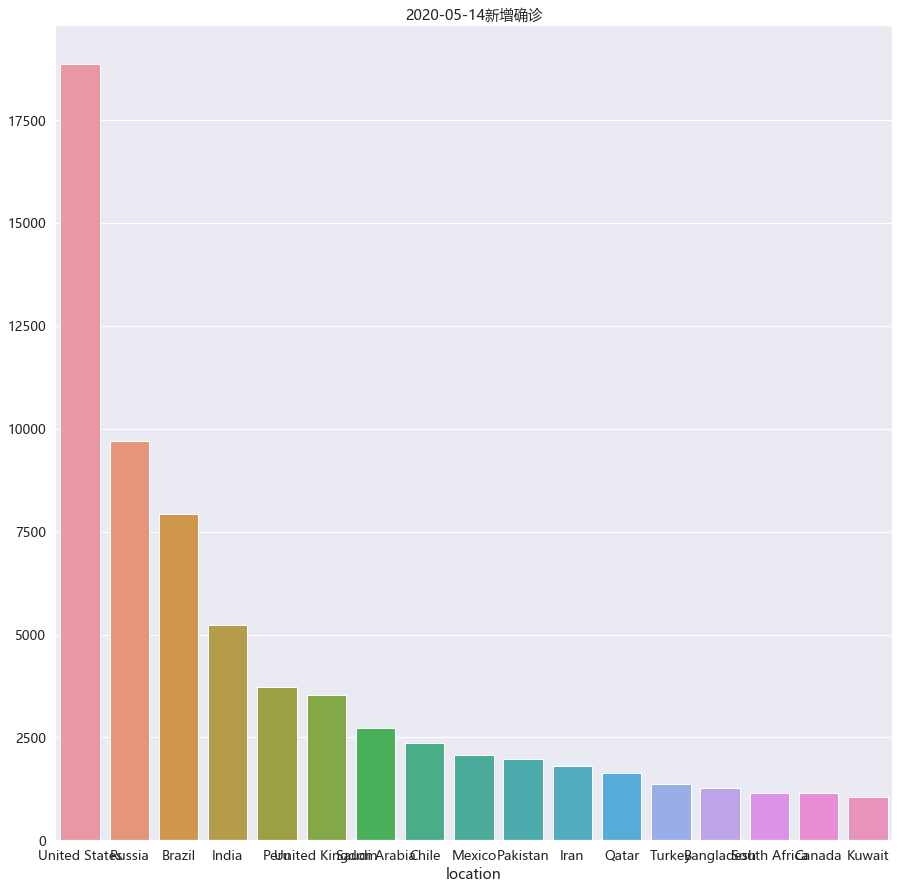

In [84]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['font.sans-serif']=['Microsoft YaHei']
matplotlib.rcParams['font.serif']=['Microsoft YaHei']

plt.figure(figsize=(15, 15))
plt.title(date+'新增确诊')
date='2020-05-18'

# import
df=pd.read_csv('./owid-covid-data.csv')
# clean
df=df.set_index(['date','location']).loc[date,['new_cases']].astype('int').sort_values('new_cases',ascending=False)
df=df[df['new_cases']>1000].iloc[1:].T
# plot
sns.set_context(font_scale=.3)
sns.barplot(data=df,label="location")
plt.show()